In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 5.0
plt.rcParams['xtick.minor.size'] = 3.0
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['legend.handlelength'] = 1.0

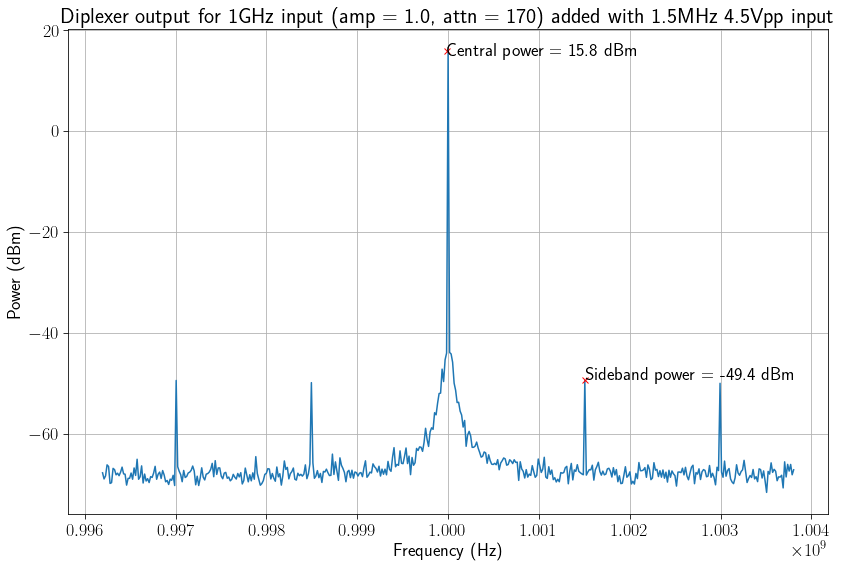

In [7]:
# Read the CSV file starting from the row which contains data
filename = '4.5V'
df = pd.read_csv(str(filename)+".csv", header = 56)
frequency = df.iloc[1:,0].astype(float)
power = df.iloc[1:,1].astype(float)

# Plot the data
plt.figure(figsize=(12,8))
plt.plot(df.iloc[1:,0].astype(float),df.iloc[1:,1].astype(float))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.grid()
plt.tight_layout()

# Aeshetics and annotation - edit accordingly

plt.title('Diplexer output for 1GHz input (amp = 1.0, attn = 170) added with 1.5MHz ' + filename+'pp input')
plt.plot(frequency[np.argmax(power)],np.max(power),'rx')
plt.annotate('Central power = %.1f dBm'%np.max(power),[frequency[np.argmax(power)],np.max(power)-1])

# find the second (right) peak

# Find the indices within the specified range
indices = np.where((frequency >= 1.001e9) & (frequency <= 1.002e9))
# Find the index of the maximum power within the specified range
peak_index = indices[0][np.argmax(power[indices[0]])]
plt.plot(frequency[peak_index],power[peak_index],'rx')
plt.annotate('Sideband power = %.1f dBm'%power[peak_index],[frequency[peak_index],power[peak_index]])

# save the figure with the filename specified above

plt.savefig(str(filename)+'pp'+'.png',dpi=300)